# SENTIMENT CLASSIFICATION OF TWEETS ABOUT APPLE AND GOOGLE PRODUCTS

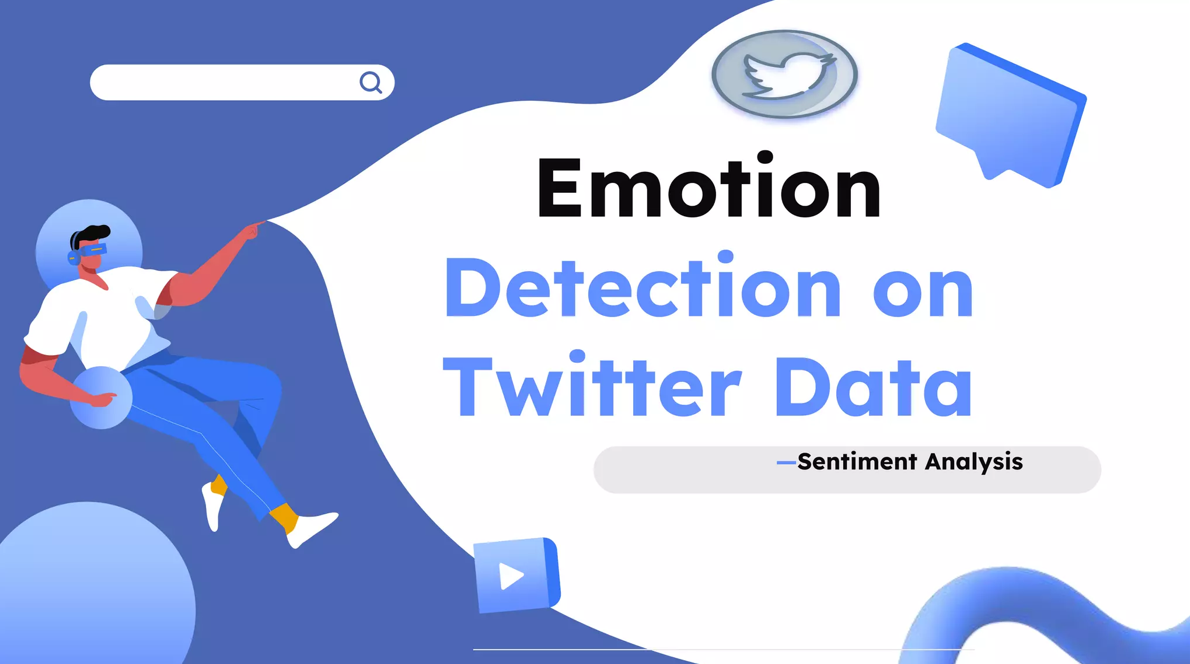

## <span style='color: green;'> Project Summary </span>

## <span style='color: green;'> Business and data understanding </span>

### <span style='color: purple;'> Business Problem </span>

In the dynamic landscape of today's interconnected world, social media shapes both personal lives and business operations. With the rapid pace of change in social media, staying connected is not just a competitive advantage; it's a necessity for financial success. Apple and Google as a business companies want to understand what people think about their products quickly. The company faces the challenge of efficiently gauging public sentiment to stay updated on what's popular. Right now, it takes a really long time for people to read and understand lots of Tweets. Our job is to develop a model that can do this fast! Succeeding on this model developmen't, Apple can get instant feedback about what people like or don't like. This helps her stay on top of things and make decisions that keep them successful in a world of competition that changes a lot.

### <span style='color: purple;'> Objectives </span>

1. To understand the perception of Apple and Google Company products by the general Public to guide Apple on areas to improve on.
2. To develop a model to classify different sentiments based on the people's perceptions about Apple and Google products.
3. Provide a sentiment breakdown for specific product features or attributes, offering detailed insights into what aspects of Apple and Google products contribute most to positive or negative sentiments.
4. Establish a user-friendly dashboard for decision-makers, presenting actionable insights derived from sentiment analysis, thus empowering Apple and Google executives to make informed decisions that align with current market sentiments and demands.

By attaining the aforementioned objectives, we will have the capability to address the following relevant questions:

a. How is Apple and Google perceived as a company, and how can they be compared to  another being main competitors?

b. How are Apple and Google's products and announcements perceived? Are there specific pain points within the products that should addressed?

### <span style='color: purple;'> Data Understanding </span>

The NLP model development utilized a dataset of 9,093 Tweets from CrowdFlower (https://data.world/crowdflower/brands-and-product-emotions via data.world) containing columns for tweets, products, and emotions related to Google and Apple.The dataset of 9,093 Tweets is vital for NLP model development, offering diverse real-world text data. It captures sentiments and emotions toward Google and Apple products, enabling the model to learn patterns, enhancing its accuracy in classifying and understanding sentiment in a broader context. This dataset forms the foundation for training the NLP model to make informed predictions about sentiments expressed in tweets regarding these technology products. 

## <span style='color: green;'> Data Preparation </span>

After gaining insights into our data, we started by filling missing values in the product column using pandas library. We searched for product names in the tweet column to complete them. We then removed rows without product mentions, duplicates, and those with unknown emotions, creating a dataset with 9,345 rows and 3 columns. For Exploratory Data Analysis (EDA), NLTK (Natural Language Toolkit) was selected for its extensive text processing capabilities. NLTK facilitated tasks such as tokenizing tweets and removing stopwords, enhancing the quality of text data for analysis. Addressing class imbalance, imbalanced-learn was employed for its specialized algorithms, utilizing random oversampling to create a more balanced training set for the sentiment analysis model, overcoming challenges posed by an uneven distribution of sentiment classes in the dataset.

## <span style='color: green;'> Modeling </span>

In the feature engineering phase, TF-IDF vectorization transformed tokens, scoring each word based on its uniqueness within tweets and prevalence across the dataset. To enable TfidfVectorizer with a dataframe, tokens were joined instead of using the conventional list format. This comprehensive approach, integrating various classifiers and feature engineering techniques, aimed to optimize the sentiment analysis model's Twitter performance.

In the modeling phase, various classifiers were utilized, starting with the base model Multinomial Naive Bayes (MultinomialNB). The second step involved searching for hyperparameters using a grid search with cross-validation. Subsequently, tweets were fitted with stopwords using the tuned parameters. The fourth step entailed fitting tweets without stopwords, followed by fitting tweets with no stopwords but stemming, using tuned parameters. Lastly, tweets with no stopwords but lemmatized were fitted with tuned parameters. The classifiers included RandomForestClassifier, Multinomial Naive Bayes, Logistic Regression, and Support Vector Classifier (SVC). This diverse approach allowed for a comprehensive exploration of the model space, enhancing overall performance in sentiment analysis on Twitter data.

## <span style='color: green;'> Evaluation </span>

The evaluation of our sentiment analysis models involved a comprehensive assessment of various metrics aligned with our specific objectives. The primary criteria for model selection were test accuracy and time efficiency. Here's a summary of the evaluation:

#### Test Accuracy:

##### Metric Focus: 

Test accuracy serves as a fundamental indicator of a model's predictive capability, crucial for effective sentiment analysis.

**Observation:** The optimized SVM model model emerged as the optimal choice with a high accuracy of 72.9%, showcasing its effectiveness in classifying unseen tweets.

#### Time Efficiency:

##### Metric Focus: 

Time efficiency is critical, especially in applications where timely predictions are essential for practical deployment.

**Observation:** While some models achieved faster training times, there was a trade-off with test accuracy. The The optimized SVM model struck a balanced and optimal performance, considering both accuracy and computational efficiency.
Model Selection:

#### Approach: 

Utilized horizontal bar graphs for training time and testing accuracy to visually compare and select the best-performing model.
Observation: The optimized SVM model demonstrated superior performance, making it the most balanced choice despite the trade-off between training time and accuracy.

## <span style='color: green;'> Data Understanding, Cleaning/Preparation and Feature Engineering </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.collections import *
from nltk import FreqDist, word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline as imbalanced_Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier
from wordcloud import WordCloud
from imblearn.pipeline import Pipeline
import time
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Setting a random seed for reproducibility
np.random.seed(0)

In [2]:
# Load the dataset from the CSV file with explicit encoding
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin-1')

# Display the DataFrame
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


The column labels are excessively lengthy and challenging for viewing. Below we modify them to enhance readability.

In [3]:
# rename columns for a cleaner look and preview 
df.rename(columns={"tweet_text": "tweet", "emotion_in_tweet_is_directed_at": "product",
                   "is_there_an_emotion_directed_at_a_brand_or_product": 'emotions'}, inplace=True)
df.head()

,tweet,product,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# observe shape and preview dataset 
print(df.shape)
df.head()

(9093, 3)


,tweet,product,emotions
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
# overview of the data with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     9092 non-null   object
 1   product   3291 non-null   object
 2   emotions  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The dataset comprises 9,093 rows and 3 columns, with missing values present in the first two variables, which requires attention before modeling.

Let's now view the values on the product and type_of_emotion columns to have a better understanding of the dataset.

In [6]:
# viewing values of the product column
df['product'].value_counts(dropna=False)

product
NaN                                5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

The "product" column values reveals that 5,802 entries are missing (NaN), with other categories such as iPad, Apple, and Google also present. Notably, similar products are categorized differently, e.g, Android App and Android. 

We can expand the character limit in the 'tweet' and 'product' columns to examine potential patterns that might assist in filling the missing values in the 'product' column. Let's observe the first and last 20 rows.

In [7]:
pd.set_option("display.max_colwidth", 500)
df.head(20)

,tweet,product,emotions
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion


In [8]:
pd.set_option("display.max_colwidth", 500)
df.tail(20)

,tweet,product,emotions
9073,At #SXSW your iphone charger is your best friend.,NaN,No emotion toward brand or product
9074,At &quot;Your Mom Has an iPad: Designing for Boomers&quot; #sxsw @mention Austin Convention Center {link},NaN,No emotion toward brand or product
9075,At &quot;Your Mom Has an iPad&quot; session #yourmom #sxsw,NaN,No emotion toward brand or product
9076,At &quot;Your Mom Has an iPad&quot; session at #SXSW (@mention ACC - Ballroom B w/ 23 others) {link},NaN,No emotion toward brand or product
9077,@mention your PR guy just convinced me to switch back to iPhone. Great #sxsw coverage. #princess,iPhone,Positive emotion
9078,Cue the hype RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles,NaN,No emotion toward brand or product
9079,&quot;papyrus...sort of like the ipad&quot; - nice! Lol! #SXSW Lavelle,iPad,Positive emotion
9080,"Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller",Other Google product or service,Negative emotion
9081,Google says reports about launch of Circles social network at #sxsw are incorrect {link} No launch today at any rate.,NaN,No emotion toward brand or product
9082,#Apple guys screaming and running by line to open the shop #austin #sxsw #ipad2 #crazyco {link},NaN,No emotion toward brand or product


Expanding the character limit for display reveals a correspondence between the product names mentioned in each tweet and the product name entered in the 'product' column.

Consequently, we proceed to fill the missing values in the 'product' column by utilizing the product names referenced in the respective tweets.

In [9]:
# Function to fill missing values in column 'product' based on product mentions in column 'tweet'
def fill_missing_products(row):
    if pd.isnull(row['product']):
        mentioned_products = []
        for product in ['Ipad', 'Google', 'Iphone', 'Android', 'Apple']:
            # Check for NaN values in 'tweet' before applying .lower()
            if pd.notnull(row['tweet']) and product.lower() in row['tweet'].lower():
                mentioned_products.append(product)
        if mentioned_products:
            return ' or '.join(mentioned_products)
    return row['product']

# Apply the function to fill missing values in column 'product'
df['product'] = df.apply(fill_missing_products, axis=1)

# Print the updated DataFrame
df

,tweet,product,emotions
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Google,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Google,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,Iphone,No emotion toward brand or product


In [10]:
df['product'].value_counts(dropna=False)

product
Google                             2127
Apple                              1349
Ipad                                977
iPad                                946
NaN                                 762
Iphone                              710
Ipad or Apple                       488
iPad or iPhone App                  470
iPhone                              297
Other Google product or service     293
Android                             289
Iphone or Android                   115
Android App                          81
Ipad or Iphone                       61
Other Apple product or service       35
Ipad or Android                      20
Google or Apple                      17
Google or Android                    14
Iphone or Apple                      12
Ipad or Iphone or Android            11
Ipad or Google                        8
Android or Apple                      5
Google or Iphone                      3
Iphone or Android or Apple            1
Ipad or Google or Iphone        

The missing values entries have reduced from 5,802 to 762. However, there are different combinations of similar products, which make them to be categorised differently. Below we ensure same products are categorised together regardless of their case names.

In [11]:
# Function to split values separated by 'or' into a list and ensure more than two products are in a list
def process_products(value):
    if pd.notna(value) and ' or ' in value:
        products_list = value.split(' or ')
        if len(products_list) > 2:
            return [', '.join(products_list)]
        else:
            return products_list
    else:
        return [value] if pd.notna(value) else [np.nan]

# Apply the function to the 'Products' column
df['product'] = df['product'].apply(process_products)

# Display the modified DataFrame
df

,tweet,product,emotions
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",[iPhone],Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW","[iPad, iPhone App]",Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,[iPad],Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,"[iPad, iPhone App]",Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",[Google],Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},[iPad],Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",[Google],No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",[Google],No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,[Iphone],No emotion toward brand or product


In [12]:
# Explode the DataFrame where values are separated by commas
df = df.explode('product')

# Display the exploded DataFrame
df

,tweet,product,emotions
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad,Positive emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad,Negative emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Google,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Google,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,Iphone,No emotion toward brand or product


In [13]:
# Examining to check if all the values have been exploded
df['product'].value_counts(dropna=False)

product
Google                    2169
Apple                     1871
Ipad                      1554
iPad                      1416
Iphone                     901
NaN                        762
iPhone App                 470
Android                    443
service                    328
iPhone                     297
Other Google product       293
Android App                 81
Other Apple product         35
Ipad, Iphone, Android       11
Iphone, Android, Apple       1
Ipad, Google, Iphone         1
Ipad, Iphone, Apple          1
Name: count, dtype: int64

Let's drop all the rows where the 'product' column values failed to be exploded. Also, we drop service because was wrongly exploded due to the condition 

In [14]:
#  Filter the rows we want to keep
df = df[~((df['product'] == 'Ipad, Iphone, Android') | 
          (df['product'] == 'Iphone, Android, Apple') |
          (df['product'] == 'Ipad, Google, Iphone') |
          (df['product'] == 'Ipad, Iphone, Apple') |
          (df['product'] == 'service'))]

df['product'].value_counts(dropna=False)

product
Google                  2169
Apple                   1871
Ipad                    1554
iPad                    1416
Iphone                   901
NaN                      762
iPhone App               470
Android                  443
iPhone                   297
Other Google product     293
Android App               81
Other Apple product       35
Name: count, dtype: int64

In [15]:
df['product'].isna().sum()/len(df)

0.07403808783521182

In [16]:
df.shape

(10292, 3)

The missing values only comprise about 7% of our dataset, dropping them will not have a big impact in our analysis.

In [17]:
# Drop missing values in the 'product' column
df.dropna(subset=['product'], inplace=True)
df.shape

(9530, 3)

Although non-exploded values service and missing entries have been dropped, we need to rename our 'product' column values to ensure consistency in grouping together values that are categorized to belong to different categories but are actually the same values

In [18]:
# Mapping dictionary for product names
product_dict = {
    'Ipad': 'iPad',
    'iPhone App': 'iPhone',
    'Iphone': 'iPhone',
    'Other Google product': 'Google',
    'Android App': 'Android',
    'Other Apple product': 'Apple',
    'Google': 'Google',
    'Apple': 'Apple',
    'iPhone': 'iPhone',
    'iPad': 'iPad',
    'Android': 'Android'
}

# Apply the mapping to the 'product' column only for the specified values
df['product'] = df['product'].map(product_dict)

# Display the updated DataFrame
df['product'].value_counts()

product
iPad       2970
Google     2462
Apple      1906
iPhone     1668
Android     524
Name: count, dtype: int64

All product categories have been correctly categorised.

In [19]:
df.isna().sum()

tweet       0
product     0
emotions    0
dtype: int64

Missing values in all the columns have been handled successfully.

**Checking for and Addressing Duplicates**

In [20]:
len(df[df.duplicated()])

21

We've identified 21 duplicated tweets in the dataset. Let's examine these duplicates for reference.

In [21]:
# Display both duplicates and their original rows
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,tweet,product,emotions
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion
17,I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone,iPhone,Negative emotion
20,Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?,iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPhone,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android,Positive emotion
466,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
774,"Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Google,No emotion toward brand or product


In [22]:
# Dropping Duplicate rows
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9509 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     9509 non-null   object
 1   product   9509 non-null   object
 2   emotions  9509 non-null   object
dtypes: object(3)
memory usage: 297.2+ KB


We can now explore the 'emotions' column to gain insights

In [23]:
# viewing values for target data(type_of_emotion column)
df.emotions.value_counts()

emotions
No emotion toward brand or product    5311
Positive emotion                      3399
Negative emotion                       635
I can't tell                           164
Name: count, dtype: int64

For easy readability, we modify this column as follows:

In [24]:
# remap categories 
emotion_map = {'No emotion toward brand or product': 'No emotion', 
              'Positive emotion': 'Positive emotion',
              'Negative emotion': 'Negative emotion',
              "I can't tell": 'Unknown'}

df.emotions = df.emotions.map(emotion_map)
df.emotions.value_counts()

emotions
No emotion          5311
Positive emotion    3399
Negative emotion     635
Unknown              164
Name: count, dtype: int64

In [25]:
# creating a variable to extract 'I can't tell' type_of_emotion
cant_tell = df[df.emotions == "Unknown"]
cant_tell

,tweet,product,emotions
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,iPad,Unknown
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,Apple,Unknown
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Google,Unknown
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Apple,Unknown
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Google,Unknown
...,...,...,...
9032,"@mention yeah, we have @mention , Google has nothing on us :) #SXSW",Google,Unknown
9037,"@mention Yes, the Google presentation was not exactly what I was expecting. #sxsw",Google,Unknown
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,iPad,Unknown
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,Apple,Unknown


To enhance our analysis and categorization, we exclude rows with unidentified emotions since they cannot be effectively analyzed or classified.

In [26]:
# Exclude rows with unidentified emotions
df = df[df['emotions'] != 'Unknown']

# Check the shape after exclusion
print(df.shape)

(9345, 3)


## <span style='color: green;'> Exploratory Data Analysis (EDA) </span>

Considering the business problem at hand, it is crucial to segregate and scrutinize both positive, negative and no emotions tweets collectively, as well as on a company and product level. Before scrutinizing, let's prepare our text.

In [27]:
def preprocess_tweet_column(df):
    # Converting 'tweet' column to str dtype
    df['tweet'] = df['tweet'].astype(str)
    
    # Tokenize using TweetTokenizer
    tokenizer = TweetTokenizer()
    df['tokens_with_stopwords'] = df['tweet'].apply(tokenizer.tokenize)
    
#     # Tokenize using RegEx
#     pattern = "([a-zA-Z0-9]+(?:'[a-z]+)?)"
#     df['tokens_with_stopwords'] = df['tweet'].apply(lambda x: nltk.regexp_tokenize(x, pattern))

    # Make sure tokens are lowercase
    df['tokens_with_stopwords'] = df['tokens_with_stopwords'].apply(lambda x: [token.lower() for token in x])

    # Create Stopwords list
    stopwords_list = stopwords.words('english') + list(string.punctuation) + list(map(str, range(10)))
    stopwords_list += ['sxsw', 'mention', 'sxsw', 'link', 'link','rt', '#sxsw'] # We add these words to stopwrds_list since 
                                                                                    # some are tweeter hashtags and others are 
                                                                                     # mentions
    
    return df, stopwords_list

df, stopwords_list = preprocess_tweet_column(df)
# Filtering out stopwords from the tokens

df['tokens_without_stopwords'] = df['tokens_with_stopwords'].apply(lambda x: [str(i) for i in x if str(i) not in stopwords_list])

In [28]:
# Generate three new dataframes, each dedicated to one of the three sentiments, aiming to analyze the most frequent words 
# for each sentiment

df_pos = df[df['emotions'] == 'Positive emotion']
df_neg = df[df['emotions'] == 'Negative emotion']
df_neu = df[df['emotions'] == 'No emotion']

# Compile a list of tokens associated with positive sentiment and utilize NLTK's FreqDist to rank them by frequency

pos_tokens_list = [token for sublist in df_pos['tokens_without_stopwords'] for token in sublist]
pos_freq_dist = FreqDist(pos_tokens_list)

# Compile a list of tokens associated with negative sentiment and utilize FreqDist to rank them by frequency

neg_tokens_list = [token for sublist in df_neg['tokens_without_stopwords'] for token in sublist]
neg_freq_dist = FreqDist(neg_tokens_list)

# Compile a list of tokens associated with neutral sentiment and utilize FreqDist to rank them by frequency

neu_tokens_list = [token for sublist in df_neu['tokens_without_stopwords'] for token in sublist]
neu_freq_dist = FreqDist(neu_tokens_list)

# Specify the desired number of words for each word cloud

k_most_common = 50


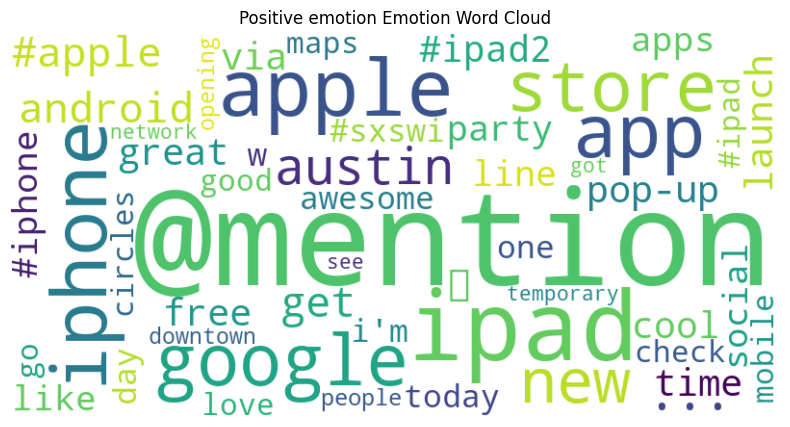

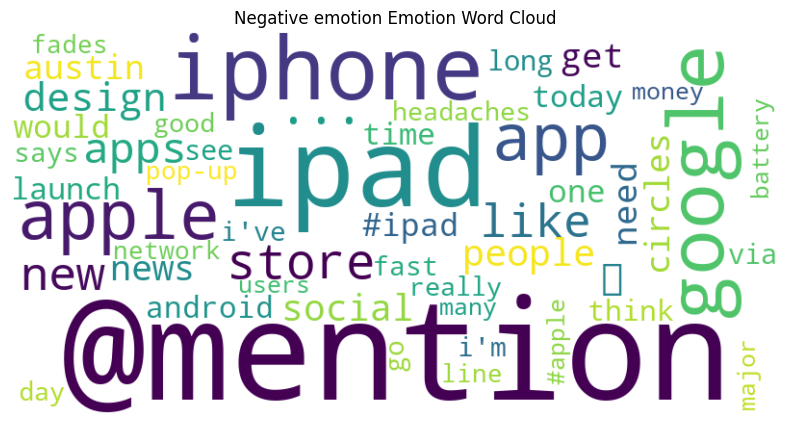

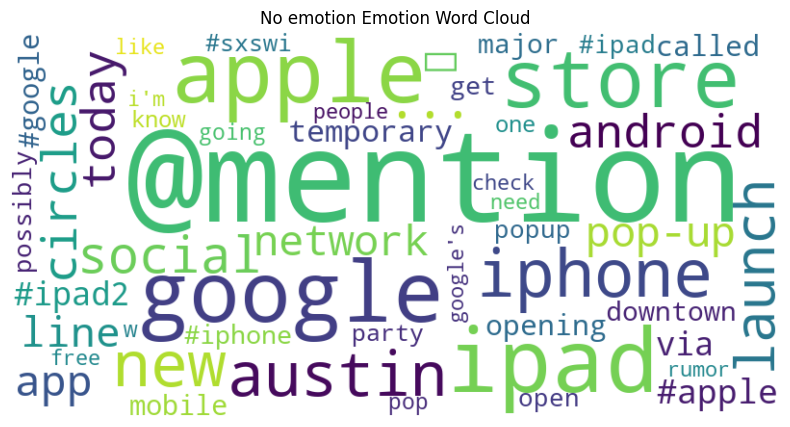

In [29]:
# Plotting word clouds for each sentiment
def visualize_sentiment_wordcloud(df, sentiment, k_most_common=50):
    # Filter DataFrame based on sentiment
    df_filtered = df[df['emotions'] == sentiment]

    # Compile a list of tokens associated with the specified sentiment
    tokens_list = [token for sublist in df_filtered['tokens_without_stopwords'] for token in sublist]

    # Generate WordCloud
    freq_dist = FreqDist(tokens_list)
    wordcloud = WordCloud(width=800, height=400, max_words=k_most_common, background_color='white').generate_from_frequencies(freq_dist)

    # Display WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Emotion Word Cloud')
    plt.axis('off')
    plt.show()

# Usage
visualize_sentiment_wordcloud(df, 'Positive emotion')
visualize_sentiment_wordcloud(df, 'Negative emotion')
visualize_sentiment_wordcloud(df, 'No emotion')


From the visualizations based on the sentiments categories, apple, ipad, iphone, google, store words appear more frequently. We notice that people talk a lot about both Apple and Google, and they use positive and negative words for both companies and their products. While these word clouds are a good way to begin, it's hard to get specific information about the companies or products from them.

### <span style='color: purple;'> Company-Wise Sentiments </span>
To delve deeper into sentiment analysis, we also conduct an investigation focused on individual companies.

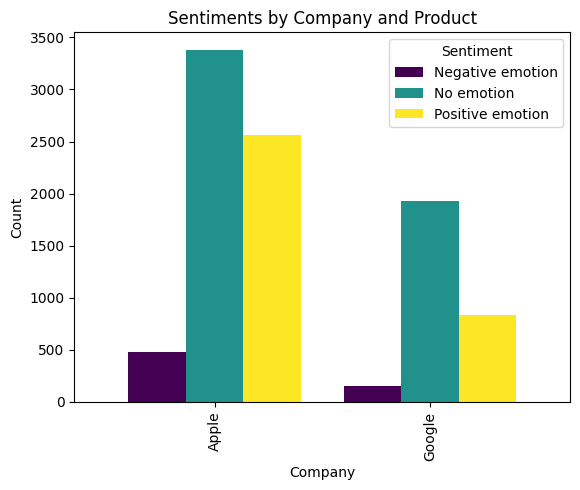

In [30]:
# Mapping products to companies
company_mapping = {
    'iPad': 'Apple',
    'iPhone': 'Apple',
    'Apple': 'Apple',
    'Google': 'Google',
    'Android': 'Google'
}

# Adding a new column 'company' based on the product mapping
df['company'] = df['product'].map(company_mapping)

# Counting the sentiments for each company's products
sentiment_counts = df.groupby(['company', 'emotions']).size().unstack(fill_value=0)

# Plotting the bar graph
sentiment_counts.plot(kind='bar', width=0.8, colormap='viridis')
plt.title('Sentiments by Company and Product')
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Based on the plot, in both Apple and Google, the predominant sentiments expressed in tweets have no emotions/ neutral, followed by a relatively smaller proportion of tweets conveying positive emotions. The least prevalent sentiment pertains to negative discussions about the products of these companies.

### <span style='color: purple;'> Company-Wise Sentiment Word Cloud visualization  </span>

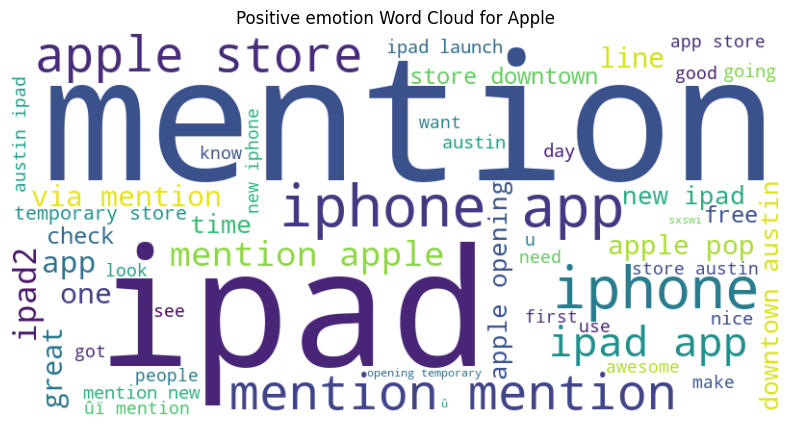

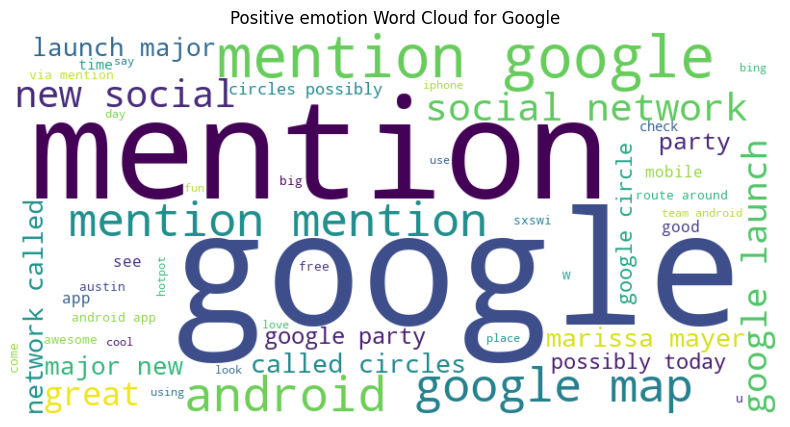

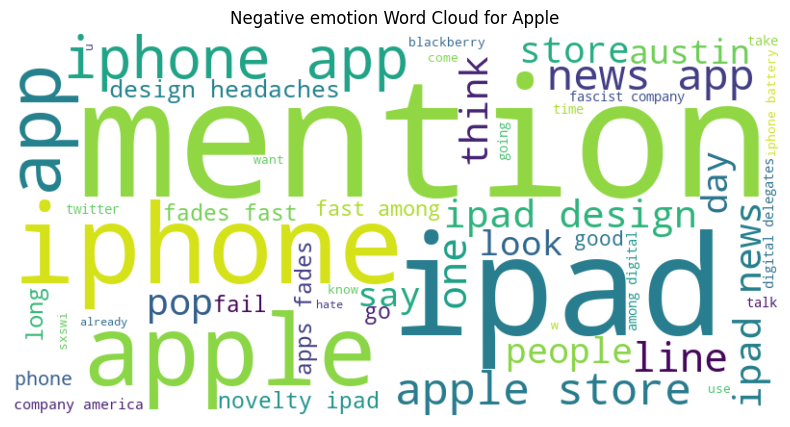

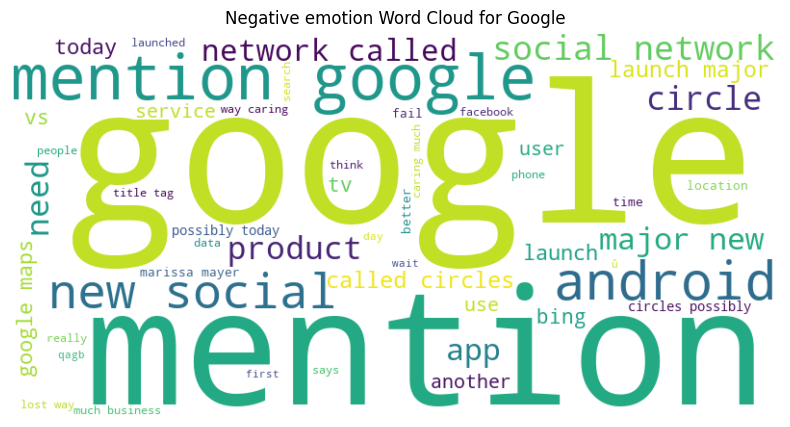

In [31]:
# Function to generate and display WordCloud for each sentiment and company
def visualize_company_sentiment_wordcloud(df, sentiment, k_most_common=50):
    # Filter DataFrame based on sentiment
    df_filtered = df[df['emotions'] == sentiment]
    
    # Generate a text corpus for each company
    corpus_by_company = {}
    for company in df_filtered['company'].unique():
        corpus_by_company[company] = ' '.join(df_filtered[df_filtered['company'] == company]['tokens_without_stopwords'].sum())
    
    # Generate and display WordCloud for each company
    for company, corpus in corpus_by_company.items():
        wordcloud = WordCloud(width=800, height=400, max_words=k_most_common, background_color='white').generate(corpus)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{sentiment.capitalize()} Word Cloud for {company}')
        plt.axis('off')
        plt.show()

# Usage
visualize_company_sentiment_wordcloud(df, 'Positive emotion')
visualize_company_sentiment_wordcloud(df, 'Negative emotion')
visualize_company_sentiment_wordcloud(df, 'Neutral')



### <span style='color: purple;'> Product Sentiment Analysis </span>
Analyzing the individual level of attention, we create the bar plot below to explore the types of positive and negative sentiments associated with each product.

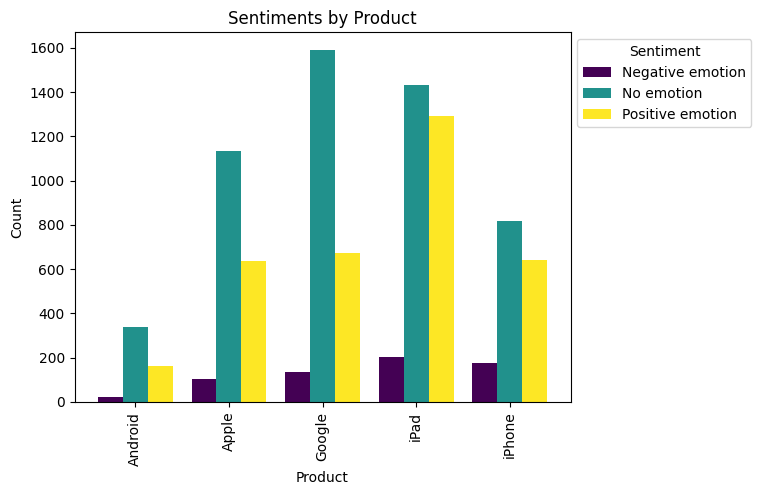

In [32]:
# Counting the sentiments for each product
product_sentiments = df.groupby(['product', 'emotions']).size().unstack(fill_value=0)

# Plotting the grouped bar graph
product_sentiments.plot(kind='bar', width=0.8, colormap='viridis')
plt.title('Sentiments by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))
plt.show();

In both companies' sentiments, a predominant trend emerges where a majority of sentiments express no/neutral emotions towards the products. Following this, sentiments characterized as positive take precedence, while the least prevalent sentiments are those conveying negative perspectives about the products.

### <span style='color: purple;'> Relationship Between the Tweet Length and Sentiments </span>
Next we now check if there is a difference between the sentiments as opposed to the length of the tweet.


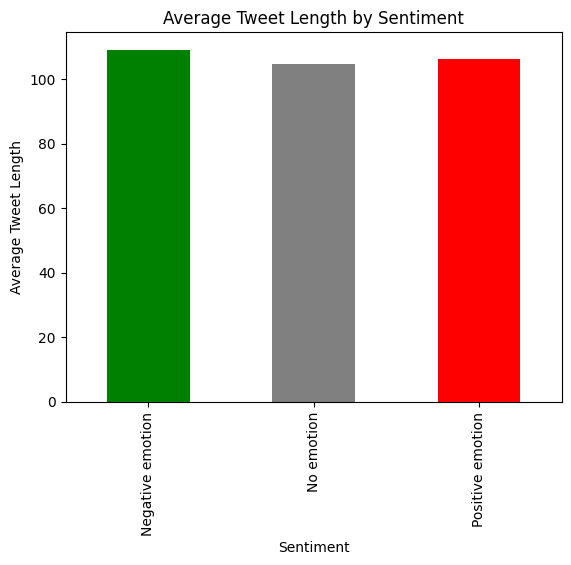

In [33]:
# Adding a new column 'tweet_length' with the length of each tweet
df['tweet_length'] = df['tweet'].apply(len)

# Calculating the average tweet length for each sentiment
average_lengths = df.groupby('emotions')['tweet_length'].mean()

# Plotting the bar graph
average_lengths.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Average Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Tweet Length')
plt.show();

Based on the bar graph, it seems like the length of the tweets doesn't really affect how positive or negative they are.

## <span style='color: green;'> Modeling </span>

Having recognized tweets as a valuable source for understanding public opinions, our aim is to apply machine learning techniques for sentiment analysis. Since the existing dataset is crowdsourced, the practical need for real-time analysis prompts both Google and Apple to seek an effective model. Such a model would predict various sentiments, contributing to product enhancement and fostering a competitive edge.

In this section, we define our feature and target variables and split the data into training and test sets. Subsequently, we utilize TF-IDF vectorization to transform the tokens, assigning a score to each word based on its uniqueness within each body of tweet and its prevalence across tweets. To enable TfidfVectorizer to function with a dataframe, we use joined tokens instead of the conventional list of tokens. We also define a function for evaluating metrics to identify the most effective models for sentiment prediction.

In [34]:
# Checking if the classes in the target variable are balanced
df['emotions'].value_counts()

emotions
No emotion          5311
Positive emotion    3399
Negative emotion     635
Name: count, dtype: int64

The output above reveals a class imbalance issue that must be addressed prior to each model training. To tackle this, we will employ random oversampling as a solution to handle the class imbalance effectively.

In [35]:
# Defining feature and target variable
X = df['tokens_with_stopwords'].apply(lambda x: ' '.join(x))
y = df['emotions']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [36]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Calculate accuracy scores
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Perform cross-validation
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv)

    # Print evaluation results
    print(f'Model Train accuracy: {accuracy_train:.3f}')
    print(f'Model Test accuracy: {accuracy_test:.3f}')
    print(f"Cross Validation Accuracy: {round(cross_val_scores.mean() * 100, 4)}%")

    print('\n--------------------------------------------\n')

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    print('\n--------------------------------------------\n')
    
    # Confusion Matrix
    cmatrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(cmatrix, annot=True, fmt='d', cmap='coolwarm')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    print('\n--------------------------------------------\n')



### <span style='color: purple;'> Baseline Model </span>

### <span style='color: purple;'> Training Model Classifiers With raw tweets(Tweets with stopwords) </span>

#### Base Model: MultinomialNB

Execution Time: 0.25 seconds
Classification Report:
Model Train accuracy: 0.803
Model Test accuracy: 0.639
Cross Validation Accuracy: 64.5263%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.29      0.60      0.39       153
      No emotion       0.77      0.64      0.70      1361
Positive emotion       0.59      0.65      0.62       823

        accuracy                           0.64      2337
       macro avg       0.55      0.63      0.57      2337
    weighted avg       0.68      0.64      0.65      2337


--------------------------------------------


--------------------------------------------



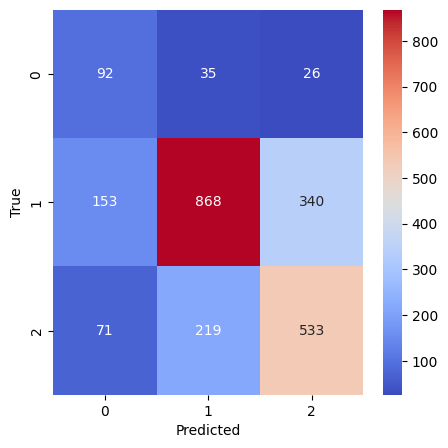

In [37]:
# Create an instance of the RandomOverSampler class
random_oversampler = RandomOverSampler(random_state=42)

# Record the start time
start_time = time.time()

# Define the pipeline with RandomOverSampler
tweet_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', MultinomialNB())
])

# Fit the pipeline on the training data
base_model = tweet_pipeline.fit(X_train, y_train)
# Record the end time
end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

print('Classification Report:')
evaluate_model(base_model, X_train, y_train, X_test, y_test)

The baseline model, using Multinomial Naive Bayes with TF-IDF vectorization and random oversampling, achieved an execution time of 0.39 seconds. The classification report indicates a training accuracy of 80.3%, testing accuracy of 63.9%, and cross-validation accuracy of 64.53%. The model shows varied precision, recall, and F1-score across sentiment classes, suggesting room for improvement in accurately predicting sentiments, especially for negative emotions.

#### Logistic Regression

Execution Time: 1.10 seconds
Classification Report:
Model Train accuracy: 0.857
Model Test accuracy: 0.678
Cross Validation Accuracy: 68.3647%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.37      0.57      0.45       153
      No emotion       0.77      0.71      0.74      1361
Positive emotion       0.63      0.65      0.64       823

        accuracy                           0.68      2337
       macro avg       0.59      0.64      0.61      2337
    weighted avg       0.69      0.68      0.68      2337


--------------------------------------------


--------------------------------------------



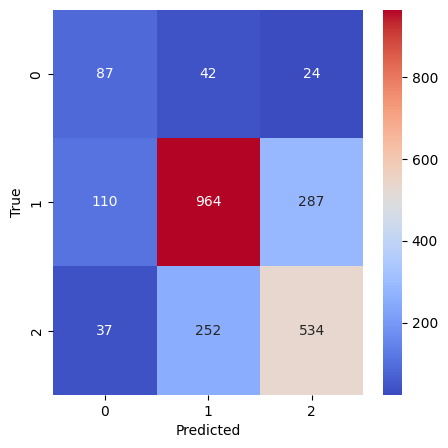

In [38]:
# Record the start time
start_time = time.time()

# Define the pipeline with RandomOverSampler and Logistic Regression
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', LogisticRegression())  # Change the classifier to Logistic Regression
])

# Fit the pipeline on the training data
lr_model = tweet_pipeline.fit(X_train, y_train)
# Record the end time
end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

print('Classification Report:')
evaluate_model(lr_model, X_train, y_train, X_test, y_test)


Compared to the Multinomial Naive Bayes baseline model, the Logistic Regression model shows improved training accuracy (85.7%), testing accuracy (67.8%), and cross-validation accuracy (68.36%). Precision, recall, and F1-score also exhibit enhancements across sentiment classes, indicating better sentiment prediction performance. However, it trains with a longer time.

#### Support Vector Machines (SVM)

Execution Time: 27.38 seconds
Classification Report:
Model Train accuracy: 0.935
Model Test accuracy: 0.721
Cross Validation Accuracy: 71.3329%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.64      0.35      0.46       153
      No emotion       0.75      0.82      0.78      1361
Positive emotion       0.67      0.63      0.65       823

        accuracy                           0.72      2337
       macro avg       0.69      0.60      0.63      2337
    weighted avg       0.72      0.72      0.71      2337


--------------------------------------------


--------------------------------------------



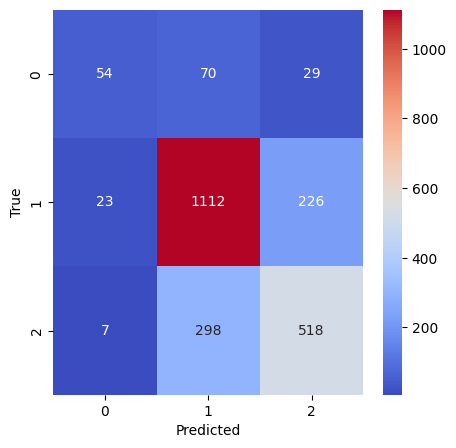

In [39]:
# Record the start time
start_time = time.time()

# Define the pipeline with RandomOverSampler and SVM
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', SVC())  # Change the classifier to Support Vector Machine (SVM)
])

# Fit the pipeline on the training data
svm_model = tweet_pipeline.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

print('Classification Report:')
evaluate_model(svm_model, X_train, y_train, X_test, y_test)


Despite having good accuracy in predicting sentiments during training (93.5%) and testing (72.1%), the Support Vector Machines (SVM) model takes more time to process compared to previous models. However, its ability to effectively predict sentiments is evident from competitive precision, recall, and F1-score for sentiment classes, showcasing SVM's effectiveness in sentiment analysis despite the longer processing time.

#### Random Forest

Training Time: 51.37 seconds
Classification Report:
Model Train accuracy: 0.997
Model Test accuracy: 0.712
Cross Validation Accuracy: 69.7206%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.77      0.30      0.43       153
      No emotion       0.73      0.85      0.79      1361
Positive emotion       0.66      0.57      0.61       823

        accuracy                           0.71      2337
       macro avg       0.72      0.57      0.61      2337
    weighted avg       0.71      0.71      0.70      2337


--------------------------------------------


--------------------------------------------



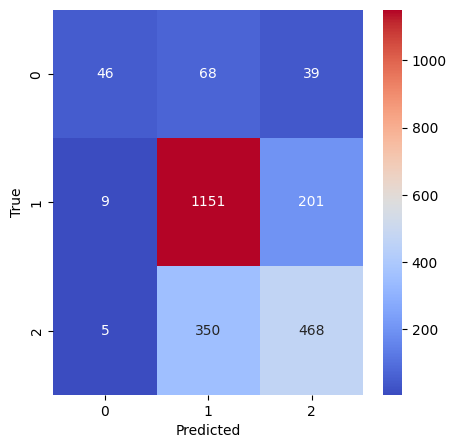

In [40]:
# Record the start time
start_time = time.time()

# Define the pipeline with RandomOverSampler and Random Forest
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', RandomForestClassifier())  # Change the classifier to Random Forest
])

# Fit the pipeline on the training data
rf_model = tweet_pipeline.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

print('Classification Report:')
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

The Random Forest model achieves high training accuracy (99.7%) but slightly lower testing accuracy (71.2%). It has a longer training time (94.46 seconds) compared to Multinomial Naive Bayes, Logistic Regression, and Support Vector Machine. While showing competitive precision, recall, and F1-score for sentiment classes, the model exhibits a notable drop in precision for negative emotions. This suggests that despite strong overall performance, the Random Forest model may face challenges in precisely predicting negative sentiments.

### <span style='color: purple;'> Training Model Classifiers With Tuned Hyperparameters </span>

#### Base Model: MultinomialNB() with Tuned Hyperparameters

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Training Time: 22.38 seconds
Best hyperparameters: {'model__alpha': 0.1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
Model Train accuracy: 0.931
Model Test accuracy: 0.691
Cross Validation Accuracy: 68.7075%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.45      0.50      0.47       153
      No emotion       0.76      0.74      0.75      1361
Positive emotion       0.63      0.65      0.64       823

        accuracy                           0.69      2337
       macro avg       0.61      0.63      0.62      2337
    weighted avg       0.70      0.69      0.69      2337


--------------------------------------------


--------------------------------------------



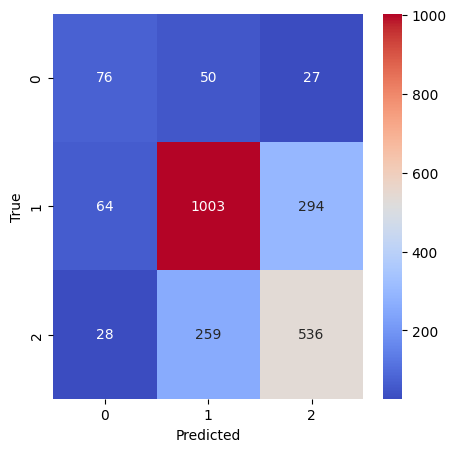

In [41]:
# Define the pipeline with RandomOverSampler and MultinomialNB
tweet_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', MultinomialNB())
])

# Define the parameter grid for MultinomialNB
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=tweet_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Record the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate and print the classification report for the model with the best hyperparameters
tuned_base_model = grid_search.best_estimator_
print('Classification Report:')
evaluate_model(tuned_base_model, X_train, y_train, X_test, y_test)


Before tuning hyperparameters, the Multinomial Naive Bayes model exhibited a training accuracy of 80.3% and a testing accuracy of 63.9%. After tuning and fitting on tweets with stopwords, the training accuracy significantly improved to 93.1%, while the testing accuracy increased to 69.1%. The tuned model demonstrates enhanced precision, recall, and F1-score for sentiment classes, indicating improved overall performance compared to the untuned version.

#### Tuned Logistic Regression Model

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Training Time: 89.86 seconds
Best hyperparameters: {'model__C': 10.0, 'model__penalty': 'l2', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
Model Train accuracy: 0.963
Model Test accuracy: 0.715
Cross Validation Accuracy: 71.3901%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.53      0.43      0.48       153
      No emotion       0.77      0.78      0.77      1361
Positive emotion       0.66      0.67      0.66       823

        accuracy                           0.72      2337
       macro avg       0.65      0.63      0.64      2337
    weighted avg       0.71      0.72      0.71      2337


--------------------------------------------


--------------------------------------------



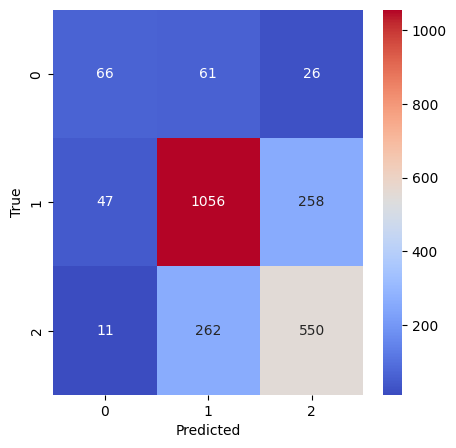

In [42]:
# Define the pipeline with RandomOverSampler and Logistic Regression
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', LogisticRegression())  # Change the classifier to Logistic Regression
])

# Define the parameter grid for Logistic Regression
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'model__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=tweet_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Record the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate and print the classification report for the model with the best hyperparameters
tuned_lr_model = grid_search.best_estimator_
print('Classification Report:')
evaluate_model(tuned_lr_model, X_train, y_train, X_test, y_test)


#### Tuned Support Vector Machines (SVM) 

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Training Time: 2077.79 seconds
Best hyperparameters: {'model__C': 10, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
Model Train accuracy: 0.980
Model Test accuracy: 0.728
Cross Validation Accuracy: 71.59%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.72      0.31      0.43       153
      No emotion       0.75      0.83      0.79      1361
Positive emotion       0.68      0.63      0.66       823

        accuracy                           0.73      2337
       macro avg       0.72      0.59      0.63      2337
    weighted avg       0.73      0.73      0.72      2337


--------------------------------------------


--------------------------------------------



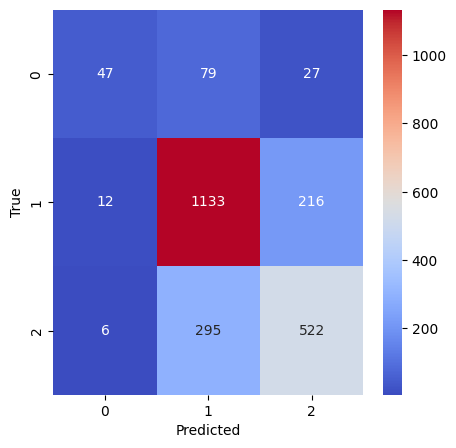

In [43]:
# Define the pipeline with RandomOverSampler and SVM
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', SVC())  # Change the classifier to Support Vector Machine (SVM)
])

# Define the parameter grid for SVM
param_grid = {
    'tfidf__max_features': [100, 500, 1000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto'],
    'model__class_weight': [None, 'balanced']
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=tweet_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Record the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate and print the classification report for the model with the best hyperparameters
tuned_svm_model = grid_search.best_estimator_
print('Classification Report:')
evaluate_model(tuned_svm_model, X_train, y_train, X_test, y_test)


#### Tuned Random Forest classifier

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Training Time: 4745.68 seconds
Best hyperparameters: {'model__max_depth': None, 'model__n_estimators': 50, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Classification Report:
Model Train accuracy: 0.997
Model Test accuracy: 0.709
Cross Validation Accuracy: 69.9201%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.71      0.29      0.42       153
      No emotion       0.72      0.86      0.78      1361
Positive emotion       0.68      0.54      0.60       823

        accuracy                           0.71      2337
       macro avg       0.70      0.56      0.60      2337
    weighted avg       0.71      0.71      0.70      2337


--------------------------------------------


--------------------------------------------



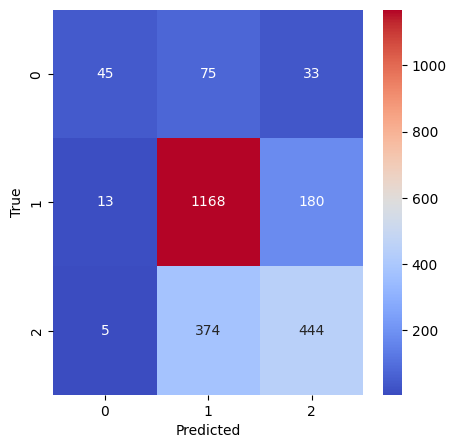

In [44]:
# Define the pipeline with RandomOverSampler and Random Forest
tweet_pipeline = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('random_oversampler', random_oversampler),  # Add RandomOverSampler as a step in the pipeline
    ('model', RandomForestClassifier())  
])

# Define the parameter grid for Random Forest
param_grid = {
    'tfidf__max_features': [100, 500, 1000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=tweet_pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Record the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate and print the classification report for the model with the best hyperparameters
tuned_rf_model = grid_search.best_estimator_
print('Classification Report:')
evaluate_model(tuned_rf_model, X_train, y_train, X_test, y_test)

### <span style='color: purple;'> Training Model Classifiers with tuned Hyperparameters without stopwords </span>

In [45]:
# Defining feature and target variable
X = df['tokens_without_stopwords'].apply(lambda x: ' '.join(x))
y = df['emotions']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Base Model: Tuned MultinomialNB classifier on tweets with no stopwords

Training Time: 0.76 seconds
MultinomialNB - Classification Report:
Model Train accuracy: 0.932
Model Test accuracy: 0.693
Cross Validation Accuracy: 67.8655%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.45      0.52      0.48       153
      No emotion       0.76      0.74      0.75      1361
Positive emotion       0.63      0.64      0.64       823

        accuracy                           0.69      2337
       macro avg       0.62      0.64      0.63      2337
    weighted avg       0.70      0.69      0.69      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


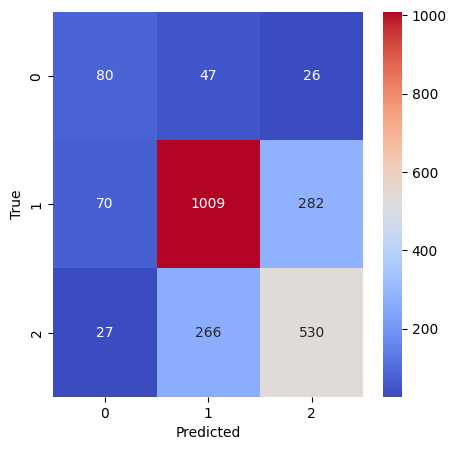

In [46]:
# Define the pipeline with RandomOverSampler and MultinomialNB
tweet_pipeline_nb = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', MultinomialNB(alpha=0.1))
])

# Record the start time
start_time = time.time()

# Fit the model
base_nsw_model = tweet_pipeline_nb.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('MultinomialNB - Classification Report:')
evaluate_model(base_nsw_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Logistic Regression on tweets with no stopwords

Training Time: 6.88 seconds
Logistic Regression - Classification Report:
Model Train accuracy: 0.962
Model Test accuracy: 0.722
Cross Validation Accuracy: 70.9334%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.59      0.45      0.51       153
      No emotion       0.77      0.79      0.78      1361
Positive emotion       0.66      0.65      0.66       823

        accuracy                           0.72      2337
       macro avg       0.67      0.63      0.65      2337
    weighted avg       0.72      0.72      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


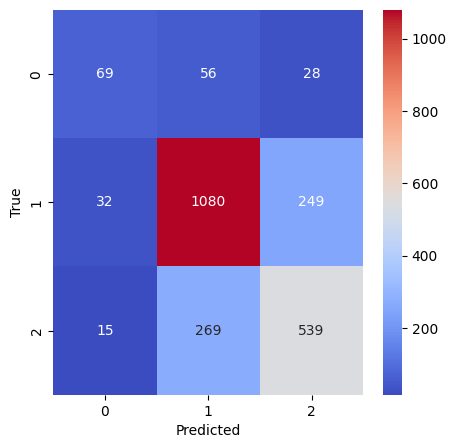

In [47]:
# Define the pipeline with RandomOverSampler and Logistic Regression
tweet_pipeline_lr = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', LogisticRegression(C=10.0, penalty='l2'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_lr_nsw_model = tweet_pipeline_lr.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


# Evaluate and print the classification report
print('Logistic Regression - Classification Report:')
evaluate_model(tuned_lr_nsw_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Support Vector Machines (SVM) on tweets with no stopwords

Training Time: 53.27 seconds
SVM - Classification Report:
Model Train accuracy: 0.983
Model Test accuracy: 0.727
Cross Validation Accuracy: 70.9048%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.75      0.30      0.43       153
      No emotion       0.75      0.84      0.79      1361
Positive emotion       0.68      0.62      0.65       823

        accuracy                           0.73      2337
       macro avg       0.73      0.59      0.62      2337
    weighted avg       0.73      0.73      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


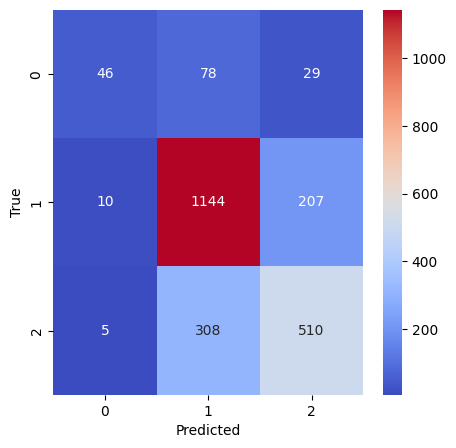

In [48]:
# Define the pipeline with RandomOverSampler and SVC
tweet_pipeline_svm = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', SVC(C=10, class_weight=None, gamma='scale', kernel='rbf'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_svm_nsw_model = tweet_pipeline_svm.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('SVM - Classification Report:')
evaluate_model(tuned_svm_nsw_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Random Forest Classifier on tweets with no stopwords

Training Time: 770.32 seconds
Random Forest - Classification Report:
Model Train accuracy: 0.994
Model Test accuracy: 0.714
Cross Validation Accuracy: 69.7919%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.73      0.29      0.41       153
      No emotion       0.73      0.84      0.78      1361
Positive emotion       0.67      0.58      0.63       823

        accuracy                           0.71      2337
       macro avg       0.71      0.57      0.61      2337
    weighted avg       0.71      0.71      0.70      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


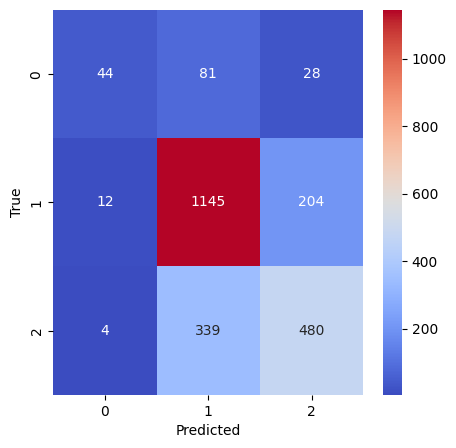

In [49]:
# Define the pipeline with RandomOverSampler and Random Forest Classifier
tweet_pipeline_rf = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=None))
])

# Record the start time
start_time = time.time()

# Fit the model
best_model_rf = tweet_pipeline_rf.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('Random Forest - Classification Report:')
evaluate_model(best_model_rf, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

### <span style='color: purple;'> Training Model Classifiers with tuned Hyperparameters on tweets with no stopwords but stemmatized </span>

In [50]:
# Define a function for stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Apply stemming to your text data
df['stemmed_tokens'] = df['tokens_without_stopwords'].map(stem_text)

# Convert the stemmed lists back to strings
df['stemmed_tokens'] = df['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Redefine feature and target variable after stemming
X = df['stemmed_tokens']
y = df['emotions']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Base Model: Tuned MultinomialNB classifier on tweets with no stopwords but stemmatized

Training Time: 0.80 seconds
MultinomialNB - Classification Report:
Model Train accuracy: 0.931
Model Test accuracy: 0.682
Cross Validation Accuracy: 67.6944%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.44      0.54      0.48       153
      No emotion       0.76      0.72      0.74      1361
Positive emotion       0.61      0.64      0.63       823

        accuracy                           0.68      2337
       macro avg       0.61      0.64      0.62      2337
    weighted avg       0.69      0.68      0.69      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


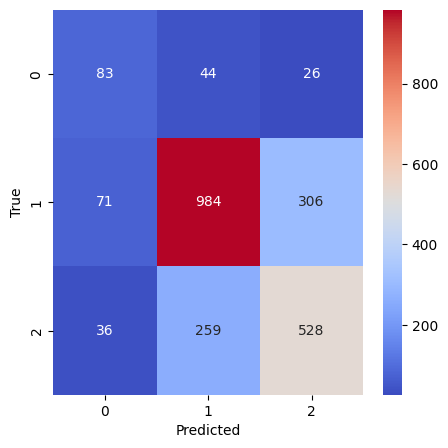

In [51]:
# Define the pipeline with RandomOverSampler and MultinomialNB
tweet_pipeline_nb = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', MultinomialNB(alpha=0.1))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_stemma_base_model = tweet_pipeline_nb.fit(X_train, y_train)
# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('MultinomialNB - Classification Report:')
evaluate_model(tuned_and_stemma_base_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Logistic Regression classifier on tweets with no stopwords but stemmatized

Training Time: 6.39 seconds
Logistic Regression - Classification Report:
Model Train accuracy: 0.959
Model Test accuracy: 0.723
Cross Validation Accuracy: 71.019%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.60      0.48      0.53       153
      No emotion       0.77      0.78      0.78      1361
Positive emotion       0.66      0.67      0.66       823

        accuracy                           0.72      2337
       macro avg       0.68      0.64      0.66      2337
    weighted avg       0.72      0.72      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


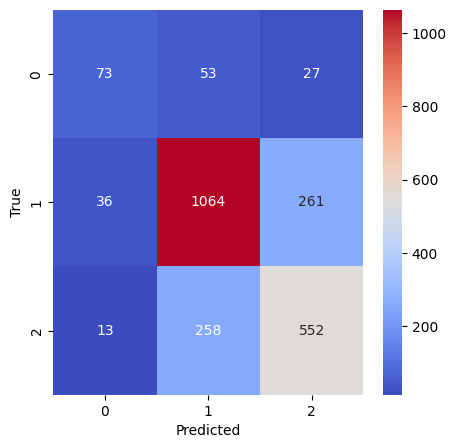

In [52]:
# Define the pipeline with RandomOverSampler and Logistic Regression
tweet_pipeline_lr = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', LogisticRegression(C=10.0, penalty='l2'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_stemma_lr_model = tweet_pipeline_lr.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('Logistic Regression - Classification Report:')
evaluate_model(tuned_and_stemma_lr_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Support Vector Machines (SVM) classifier on tweets with no stopwords but stemmatized

Training Time: 57.54 seconds
SVM - Classification Report:
Model Train accuracy: 0.983
Model Test accuracy: 0.724
Cross Validation Accuracy: 71.0475%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.77      0.33      0.46       153
      No emotion       0.75      0.83      0.79      1361
Positive emotion       0.67      0.62      0.65       823

        accuracy                           0.72      2337
       macro avg       0.73      0.59      0.63      2337
    weighted avg       0.72      0.72      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


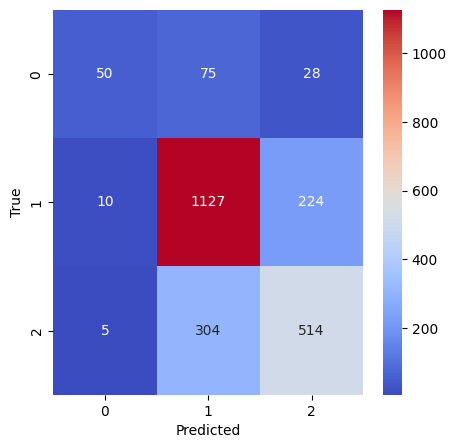

In [53]:
# Define the pipeline with RandomOverSampler and SVC
tweet_pipeline_svm = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', SVC(C=10, class_weight=None, gamma='scale', kernel='rbf'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_stemma_svm_model = tweet_pipeline_svm.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('SVM - Classification Report:')
evaluate_model(tuned_and_stemma_svm_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Random Forest classifier on tweets with no stopwords but stemmatized

Training Time: 439.84 seconds
Random Forest - Classification Report:
Model Train accuracy: 0.994
Model Test accuracy: 0.716
Cross Validation Accuracy: 69.3352%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.78      0.32      0.45       153
      No emotion       0.73      0.83      0.78      1361
Positive emotion       0.68      0.60      0.63       823

        accuracy                           0.72      2337
       macro avg       0.73      0.58      0.62      2337
    weighted avg       0.72      0.72      0.71      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


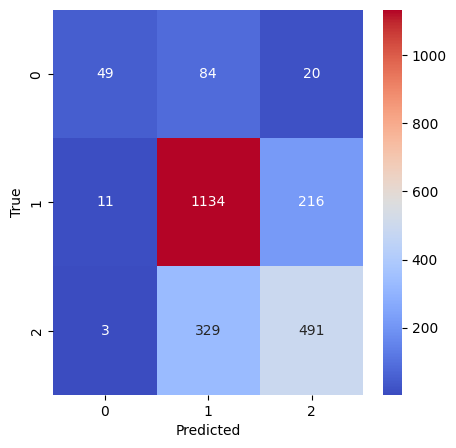

In [54]:
# Define the pipeline with RandomOverSampler and Random Forest Classifier
tweet_pipeline_rf = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=None))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_stemma_rf_model = tweet_pipeline_rf.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('Random Forest - Classification Report:')
evaluate_model(tuned_and_stemma_rf_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

### <span style='color: purple;'> Training Model Classifiers with tuned Hyperparameters on tweets with no stopwords but Lemmatized </span>

In [55]:
# Download WordNet dataset for lemmatization
nltk.download('wordnet')

# Define a function for lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to your text data
df['lemmatized_tokens'] = df['tokens_without_stopwords'].map(lemmatize_text)

# Convert the lemmatized lists back to strings
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Redefine feature and target variable after lemmatization
X = df['lemmatized_tokens']
y = df['emotions']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VSiocha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Base Model: Tuned MultinomialNB classifier on tweets with no stopwords but Lemmatized

Training Time: 0.37 seconds
MultinomialNB - Classification Report:
Model Train accuracy: 0.932
Model Test accuracy: 0.688
Cross Validation Accuracy: 67.6943%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.44      0.52      0.47       153
      No emotion       0.76      0.74      0.75      1361
Positive emotion       0.62      0.64      0.63       823

        accuracy                           0.69      2337
       macro avg       0.61      0.63      0.62      2337
    weighted avg       0.69      0.69      0.69      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


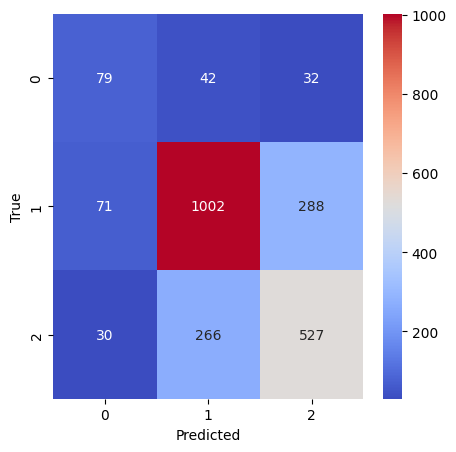

In [56]:
tweet_pipeline_nb = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', MultinomialNB(alpha=0.1))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_lemma_base_model = tweet_pipeline_nb.fit(X_train, y_train)


# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('MultinomialNB - Classification Report:')
evaluate_model(tuned_and_lemma_base_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

#### Tuned Logistic Regression classifier on tweets with no stopwords but lemmatized

Training Time: 4.27 seconds
Logistic Regression - Classification Report:
Model Train accuracy: 0.963
Model Test accuracy: 0.721
Cross Validation Accuracy: 70.6765%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.61      0.44      0.51       153
      No emotion       0.76      0.80      0.78      1361
Positive emotion       0.66      0.65      0.65       823

        accuracy                           0.72      2337
       macro avg       0.68      0.63      0.65      2337
    weighted avg       0.72      0.72      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


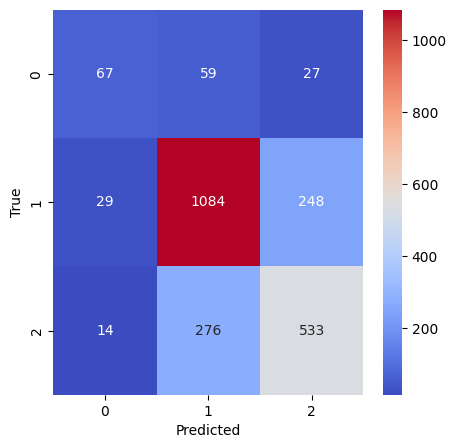

In [57]:
tweet_pipeline_lr = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', LogisticRegression(C=10.0, penalty='l2'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_lemma_lr_model = tweet_pipeline_lr.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")


# Evaluate and print the classification report
print('Logistic Regression - Classification Report:')
evaluate_model(tuned_and_lemma_lr_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")


#### Tuned Support Vector Machines (SVM) classifier on tweets with no stopwords but lemmatized

Training Time: 34.09 seconds
SVM - Classification Report:
Model Train accuracy: 0.983
Model Test accuracy: 0.729
Cross Validation Accuracy: 70.8906%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.75      0.30      0.43       153
      No emotion       0.75      0.84      0.79      1361
Positive emotion       0.68      0.63      0.65       823

        accuracy                           0.73      2337
       macro avg       0.73      0.59      0.63      2337
    weighted avg       0.73      0.73      0.72      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


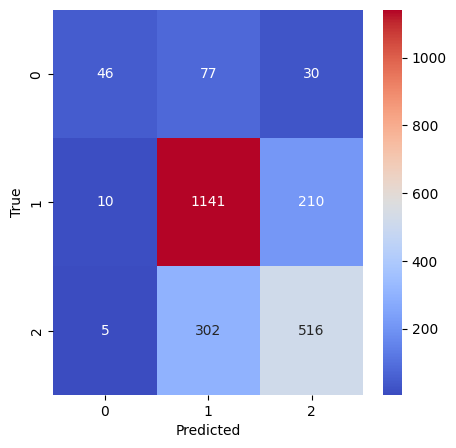

In [58]:
tweet_pipeline_svm = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', SVC(C=10, class_weight=None, gamma='scale', kernel='rbf'))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_lemma_svm_model = tweet_pipeline_svm.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('SVM - Classification Report:')
evaluate_model(tuned_and_lemma_svm_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")


#### Tuned Random Forest classifier on tweets with no stopwords but lemmatized

Training Time: 426.72 seconds
Random Forest - Classification Report:
Model Train accuracy: 0.994
Model Test accuracy: 0.718
Cross Validation Accuracy: 69.3068%

--------------------------------------------

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.75      0.29      0.42       153
      No emotion       0.73      0.84      0.78      1361
Positive emotion       0.68      0.59      0.63       823

        accuracy                           0.72      2337
       macro avg       0.72      0.57      0.61      2337
    weighted avg       0.72      0.72      0.71      2337


--------------------------------------------


--------------------------------------------

--------------------------------------------


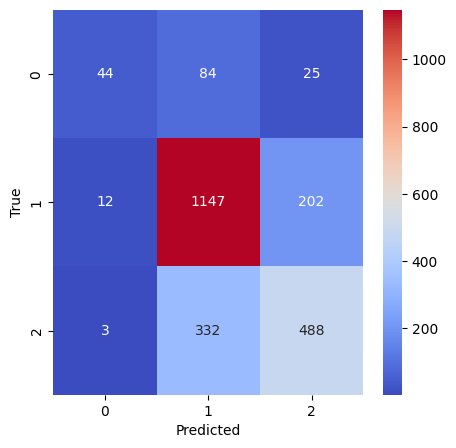

In [59]:
tweet_pipeline_rf = imbalanced_Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, ngram_range=(1, 2))),
    ('random_oversampler', random_oversampler),
    ('model', RandomForestClassifier(n_estimators=200, max_depth=None))
])

# Record the start time
start_time = time.time()

# Fit the model
tuned_and_lemma_rf_model = tweet_pipeline_rf.fit(X_train, y_train)


# Record the end time
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Evaluate and print the classification report
print('Random Forest - Classification Report:')
evaluate_model(tuned_and_lemma_rf_model, X_train, y_train, X_test, y_test)
print("--------------------------------------------")

## <span style='color: green;'> Evaluation </span>

Having trained a total of 20 models, including the baseline model, our next step involves evaluating and selecting the optimal model. This selection process is based on model metrics aligned with our specific model development objectives. To facilitate this, we will construct a comprehensive dataframe that consolidates the results from all the trained models.

In [60]:
# Combine all the results with shortened model names and column names
combined_results_data = [
    ("Base NB", "None", 0.25, 80.3, 63.9, 64.5, 0.60, 0.64, 0.65, 0.29, 0.77, 0.59),
    ("LR", "None", 1.10, 85.7, 67.8, 68.4, 0.57, 0.71, 0.65, 0.37, 0.77, 0.63),
    ("SVM", "None", 27.38, 93.5, 72.1, 71.3, 0.35, 0.82, 0.63, 0.64, 0.75, 0.67),
    ("RF", "None", 51.37, 99.7, 71.2, 69.7, 0.30, 0.85, 0.57, 0.77, 0.73, 0.66),
    ("Tuned NB", "None", 22.38, 93.1, 69.1, 68.7, 0.50, 0.74, 0.65, 0.45, 0.76, 0.63),
    ("Tuned LR", "None", 89.86, 96.3, 71.5, 71.4, 0.43, 0.78, 0.67, 0.53, 0.77, 0.66),
    ("Tuned SVM", "None", 2077.79, 98.0, 72.8, 71.6, 0.31, 0.83, 0.63, 0.72, 0.75, 0.68),
    ("Tuned RF", "None", 4745.68, 99.7, 71.5, 70.5, 0.29, 0.86, 0.55, 0.75, 0.72, 0.69),
    ("Tuned Base NB No SW", "No SW", 0.76, 93.2, 69.3, 67.9, 0.52, 0.74, 0.64, 0.45, 0.76, 0.63),
    ("Tuned LR No SW", "No SW", 6.88, 96.2, 72.2, 70.9, 0.45, 0.79, 0.65, 0.59, 0.77, 0.66),
    ("Tuned SVM No SW", "No SW", 53.27, 98.3, 72.7, 70.9, 0.30, 0.84, 0.62, 0.75, 0.75, 0.68),
    ("Tuned RF No SW", "No SW", 770.32, 99.4, 72.0, 69.6, 0.30, 0.84, 0.60, 0.75, 0.74, 0.68),
    ("Tuned Base NB No SW, Stem", "No SW, Stem", 0.80, 93.1, 68.2, 67.7, 0.54, 0.72, 0.64, 0.44, 0.76, 0.61),
    ("Tuned LR No SW, Stem", "No SW, Stem", 6.39, 95.9, 72.3, 71.0, 0.48, 0.78, 0.67, 0.60, 0.77, 0.66),
    ("Tuned SVM No SW, Stem", "No SW, Stem", 57.54, 98.3, 72.4, 71.0, 0.33, 0.83, 0.62, 0.77, 0.75, 0.67),
    ("Tuned RF No SW, Stem", "No SW, Stem", 439.84, 99.4, 72.4, 69.8, 0.31, 0.84, 0.60, 0.77, 0.74, 0.69),
    ("Tuned Base NB No SW, Lem", "No SW, Lem", 0.37, 93.2, 68.8, 67.7, 0.52, 0.74, 0.64, 0.44, 0.76, 0.62),
    ("Tuned LR No SW, Lem", "No SW, Lem", 4.27, 96.3, 72.1, 70.7, 0.44, 0.80, 0.65, 0.61, 0.76, 0.66),
    ("Tuned SVM No SW, Lem", "No SW, Lem", 34.09, 98.3, 72.9, 70.9, 0.30, 0.84, 0.63, 0.75, 0.75, 0.68),
    ("Tuned RF No SW, Lem", "No SW, Lem", 426.72, 99.4, 71.6, 69.3, 0.29, 0.84, 0.59, 0.73, 0.73, 0.68),
]

# Create a DataFrame with shortened column names
columns = [
    "Model", "Prep", "Train Time (s)", "Train Acc (%)", "Test Acc (%)", "CV Acc (%)",
    "Recall Neg", "Recall Neu", "Recall Pos", "Precision Neg", "Precision Neu", "Precision Pos"
]
combined_results_df = pd.DataFrame(combined_results_data, columns=columns)

# Print the DataFrame
combined_results_df


,Model,Prep,Train Time (s),Train Acc (%),Test Acc (%),CV Acc (%),Recall Neg,Recall Neu,Recall Pos,Precision Neg,Precision Neu,Precision Pos
0,Base NB,None,0.25,80.3,63.9,64.5,0.60,0.64,0.65,0.29,0.77,0.59
1,LR,None,1.10,85.7,67.8,68.4,0.57,0.71,0.65,0.37,0.77,0.63
2,SVM,None,27.38,93.5,72.1,71.3,0.35,0.82,0.63,0.64,0.75,0.67
3,RF,None,51.37,99.7,71.2,69.7,0.30,0.85,0.57,0.77,0.73,0.66
4,Tuned NB,None,22.38,93.1,69.1,68.7,0.50,0.74,0.65,0.45,0.76,0.63
5,Tuned LR,None,89.86,96.3,71.5,71.4,0.43,0.78,0.67,0.53,0.77,0.66
6,Tuned SVM,None,2077.79,98.0,72.8,71.6,0.31,0.83,0.63,0.72,0.75,0.68
7,Tuned RF,None,4745.68,99.7,71.5,70.5,0.29,0.86,0.55,0.75,0.72,0.69
8,Tuned Base NB No SW,No SW,0.76,93.2,69.3,67.9,0.52,0.74,0.64,0.45,0.76,0.63
9,Tuned LR No SW,No SW,6.88,96.2,72.2,70.9,0.45,0.79,0.65,0.59,0.77,0.66


#### Model Selection

In the process of evaluating and selecting the optimal model for our sentiment analysis task, we have considered a range of metrics to comprehensively assess performance. Among these metrics, we prioritize test accuracy and time efficiency as the primary criteria for model selection because of the following reasons:
1. Test accuracy serves as a fundamental indicator of a model's overall predictive capability. It provides a clear and intuitive measure of how well the model generalizes to unseen data. In the context of sentiment analysis, accurately classifying tweets into their respective categories is of paramount importance for the effectiveness of the deployed model. Therefore, maximizing test accuracy ensures that the selected model consistently delivers reliable predictions, contributing directly to the model's efficacy in real-world applications.
2. We recognize the significance of time efficiency, especially in applications where timely predictions are crucial. The computational resources required during both training and inference phases directly impact the model's practical utility. 

By considering the time taken for training and making predictions, we aim to identify a model that strikes an optimal balance between accuracy and computational efficiency. 

Now, we'll use horizontal bar graphs—one for training time and the other for testing accuracy—to compare and pick the best model.

**Plot of model type vs Time taken to Train**

In [61]:
# Sort the DataFrame by execution time for better visualization
sorted_train_time_df = combined_results_df.sort_values(by='Train Time (s)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Train Time (s)', y='Model', sorted_train_time_df, palette='viridis')
plt.title('Model Training Time Comparison')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Model')
plt.show();

SyntaxError: positional argument follows keyword argument (411094204.py, line 6)

**Plot of model type vs Testing Accuracy**

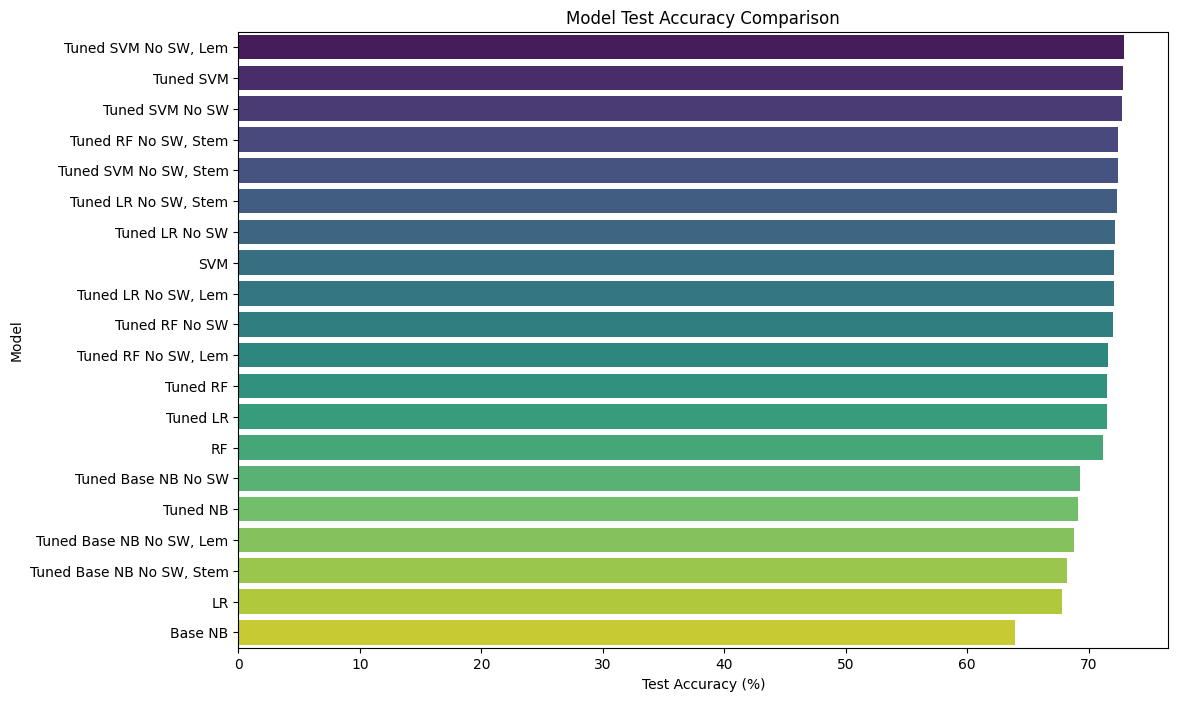

In [76]:
# Sort the DataFrame by Test Accuracy for better visualization
sorted_test_acc_df = combined_results_df.sort_values(by='Test Acc (%)', ascending=False)

# Create a bar plot for Test Accuracy
plt.figure(figsize=(12, 8))
sns.barplot(x='Test Acc (%)', y='Model', data=sorted_test_acc_df, palette='viridis')
plt.title('Model Test Accuracy Comparison')
plt.xlabel('Test Accuracy (%)')
plt.ylabel('Model')
plt.show()

##### Plots observation and interpretation

The optimized Support Vector Machines (SVM) model, developed from lemmatized tweets without stopwords, exhibits superior performance in classifying unseen tweets, boasting an accuracy of 72.9%. Prioritizing training time, faster models compromise test accuracy. In this trade-off, the optimized SVM shines as the most balanced choice. Despite potential overfitting challenges affecting "Tuned SVM No SW, Lem" and other models, evaluating precision and recall, the "Tuned SVM No SW, Lem" model demonstrates robust and comprehensive performance, solidifying its position as the optimal solution for sentiment analysis tasks. Its ability to efficiently handle real-time applications and consistently deliver reliable predictions underscores its suitability for practical deployment.

## <span style='color: green;'> Conclusion </span>

1. Significant discussions center around Apple and Google, with users expressing both positive, neutral and negative sentiments towards the companies and their products. This indicates diverse opinions and engagement across platforms about Google and Apple products. 
2. The optimized Support Vector Machines (SVM) model, built from lemmatized tweets without stopwords, emerged as the best performer with a 72.9% accuracy of classifying unseen tweets based on sentiments.
3. In talks about Apple and Google, most users are feeling okay or happy, which means they like the products. There aren't many unhappy ones, but some small adjustents, like improving the battery, design, fading, networks, Google iOS, etc, could make users of these products even happier. For instance, Numerous tweets mention Kara Swisher and describe Apple as a "fascist company."
4. People talk about Samsung in tweets when they talk about Android, which means some users might like Samsung more than Google's products. However, the launch of Google's latest social network project, "Circle," appears to have generated considerable excitement. It is mentioned a lot in the category of Google positive sentiments sparking a lot of discussions
5. Google and Apple are stiff competitors and are both relevant according to the tweet sentiments with mininimal tweets being with negative emotions.

## <span style='color: green;'> Limitations </span>

1. The dataset, consisting of 9,092 tweets, is relatively small, presenting challenges in building a more generalized model due to its limited size and potential constraints on generalization.
2. The study looks at information available to the public only, on tweeter platform of a specific hashtag. It might not include opinions from specific groups or smaller markets who are not in tweeter.
3. Opinions are personal, and the model might not understand all the different ways people express themselves. Sarcasm and subtle language can be tricky for the tool to understand.
4. Significant class imbalance, with a majority of tweets being neutral (61%), poses challenges in accurately capturing and addressing negative sentiments, potentially affecting the identification of areas for improvement.

##  <span style='color: green;'> Recommendations </span>

***1. Enhance Product Features Based on the tweet sentiments:***
Apple and Google should proactively address user concerns and criticisms. For example, Apple can improve iPhone battery life and iPad design, while Google should consistently enhance its social networks and Android iOS performance. This strategic approach ensures increased user satisfaction, thereby expanding market share and driving revenue growth.

***2. Diversify Data Sources for a Comprehensive View:***
Expand data collection beyond Twitter to include opinions from specific groups or smaller markets not covered by the current dataset, ensuring a more comprehensive understanding.

***3. Implement Sentiment Analysis Refinement:***
Explore the integration of Neural Networks to significantly enhance model performance. Consider incorporating Deep Learning methodologies in future projects for more accurate and enhanced tweet classification.

***4. Strategic Marketing for Positive Sentiments:***
Utilize the buzz around Google's "Circle" project as a valuable marketing tool. Integrate it strategically into promotional efforts to magnify positive sentiments, encouraging greater brand interaction and conversation. This strategic approach enhances the overall public image, potentially attracting a larger customer base and strengthening Google's market standing.

***5. Address Neutral Sentiments Through Proactive Measures to make them positive:***
Despite the minimal negative sentiments, proactively address any identified areas for improvement to maintain a positive brand image and stay competitive in the market. Also, conduct a focused analysis to discern sentiments of the neutral majority, allowing for focused strategies that can enhance both brand perception and market promotion. This can also help to address the unreavealed negative sentiments existing amongst the neutral majority class.

## <span style='color: green;'> Deployment </span>